**PointRend**

A MaskRCNN consegui se sair bem dizendo se é ou não um objeto, mas a máscara não contorna bem o contorno do objeto. O PointRend -> trata o problema de segmentação de instâncias como um problema de renderização.

**Download do Detectron2**

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14060, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14060 (delta 4), reused 8 (delta 2), pack-reused 14046
Receiving objects: 100% (14060/14060), 5.78 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (10167/10167), done.


In [ ]:
!pip install ./detectron2

In [ ]:
!pip install --upgrade pyyaml

In [1]:
# Caso ocorram erros para instalar o detector2
!pip install pyyaml==5.1

import torch, torchvision
!git clone --branch v0.6 https://github.com/facebookresearch/detectron2.git detectron2_repo

!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [2]:
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

<Logger detectron2 (DEBUG)>

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog

In [5]:
coco_metadata = MetadataCatalog.get('coco_2017_val')

In [6]:
from detectron2.projects import point_rend

In [7]:
import numpy as np
import cv2
import torch
from google.colab.patches import cv2_imshow
from skimage.io import imread
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
!cp -r /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/fotos /content/fotos

**Configuração da Mask RCNN**

In [26]:
# Carregando a Mask Rcnn a partir do detectron2
config = get_cfg()
config.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))

In [27]:
config.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')

In [28]:
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

In [29]:
config.MODEL.DEVICE = 'cpu' # Para trabalhar com GPU deve-se colocar a palavra cude

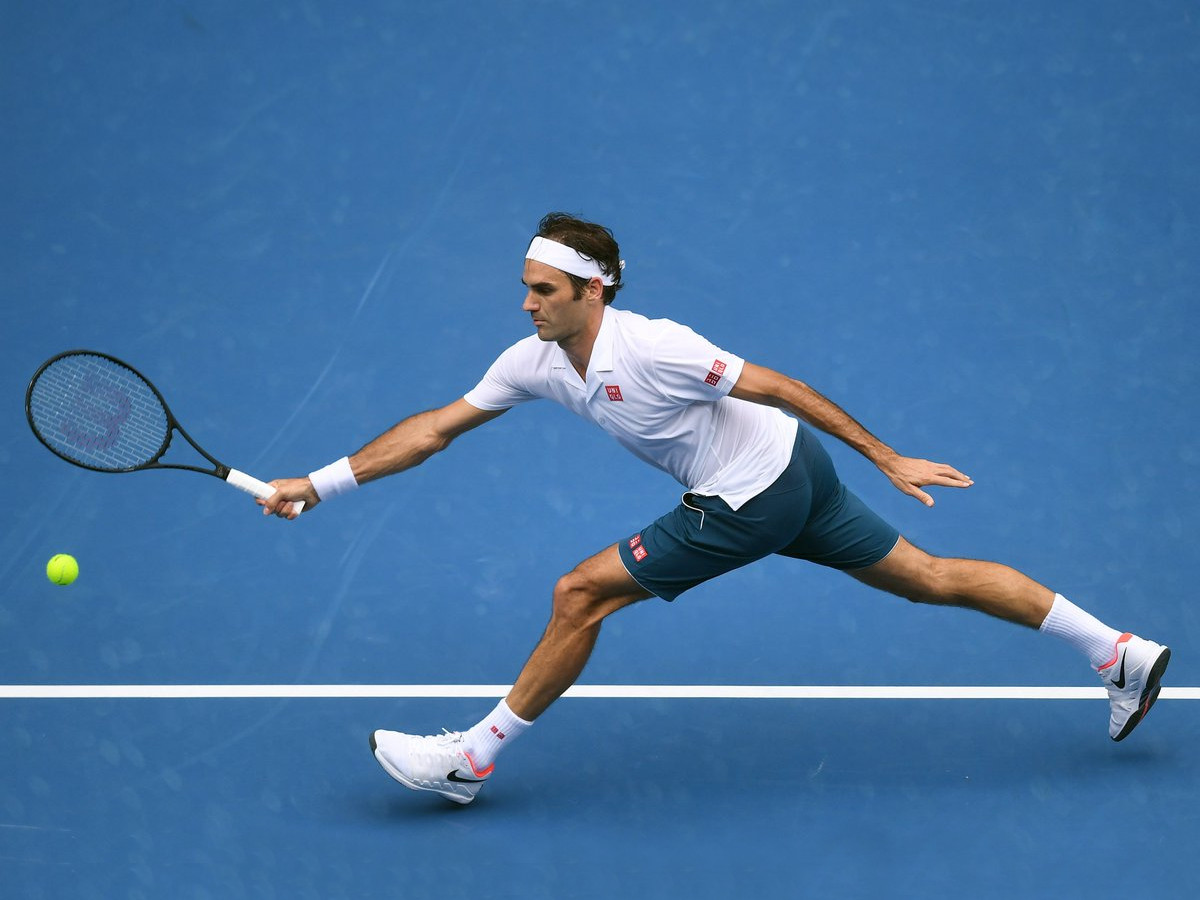

In [30]:
img = cv2.imread('/content/fotos/tenis01.jpg')
cv2_imshow(img)

**Segmentação da imagem com o Mask RCNN**

In [31]:
mask_rcnn_predictor = DefaultPredictor(config)
saida_mask_rcnn = mask_rcnn_predictor(img)

model_final_f10217.pkl: 178MB [00:31, 5.69MB/s]                           
/content/detectron2_repo/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [32]:
mask_rcnn_predictor

In [33]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
v = Visualizer(rgb, coco_metadata, scale = 1)

# Visualizando a segmentação
resultado_mask_rcnn = v.draw_instance_predictions(saida_mask_rcnn['instances'].to('cpu')).get_image()

In [24]:
def mostrar_imagem(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18, 8)
  plt.imshow(imagem)
  plt.axis('off')
  plt.show()

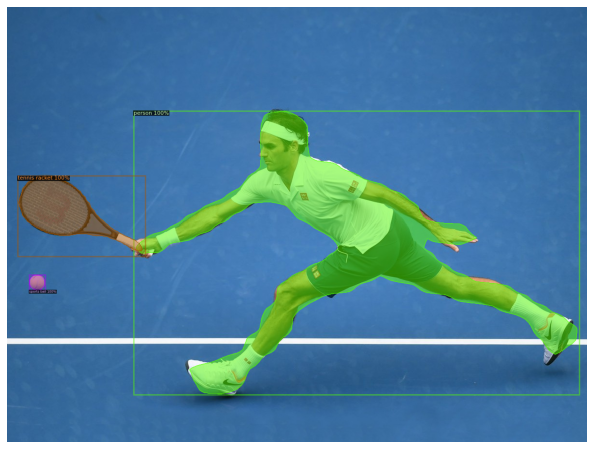

In [34]:
mostrar_imagem(resultado_mask_rcnn)

**Configuração do PointRend**

In [40]:
cfg = get_cfg()

point_rend.add_pointrend_config(cfg)
cfg.merge_from_file('/content/detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco.yaml')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = 'detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco/28119989/model_final_ba17b9.pkl'
predictor = DefaultPredictor(cfg)

WARNING [05/14 22:27:59 d2.projects.point_rend.mask_head]: Weight format of PointRend models have changed! Applying automatic conversion now ...


The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [20]:
img = cv2.imread('/content/fotos/tenis01.jpg')
saida = predictor(img)
saida

/content/detectron2_repo/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/content/detectron2_repo/projects/PointRend/point_rend/point_features.py:142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  point_coords[:, :, 1] = h_step / 2.0 + (point

{'instances': Instances(num_instances=3, image_height=900, image_width=1200, fields=[pred_boxes: Boxes(tensor([[ 258.3854,  212.4256, 1172.0596,  803.4974],
         [  18.7769,  347.7721,  302.6158,  515.5911],
         [  45.7456,  553.7955,   79.1164,  586.1190]], device='cuda:0')), scores: tensor([0.9997, 0.9993, 0.9976], device='cuda:0'), pred_classes: tensor([ 0, 38, 32], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False,

In [22]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
v = Visualizer(rgb, coco_metadata, scale = 1)

# Visualizando a segmentação
resultado_point_rend = v.draw_instance_predictions(saida['instances'].to('cpu')).get_image()

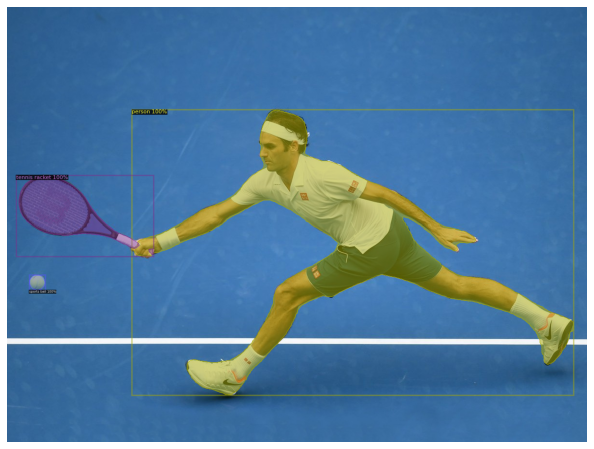

In [25]:
mostrar_imagem(resultado_point_rend)

In [38]:
def comparar(resultado_mask_rcnn, resultado_point_rend):
  fig = plt.figure(figsize=(20,14))

  fig.add_subplot(1, 2, 1)
  plt.imshow(resultado_mask_rcnn)
  plt.axis('off')
  plt.title('Mask RCNN');

  fig.add_subplot(1, 2, 2)
  plt.imshow(resultado_point_rend)
  plt.axis('off')
  plt.title('Mask RCNN + Point Rend');

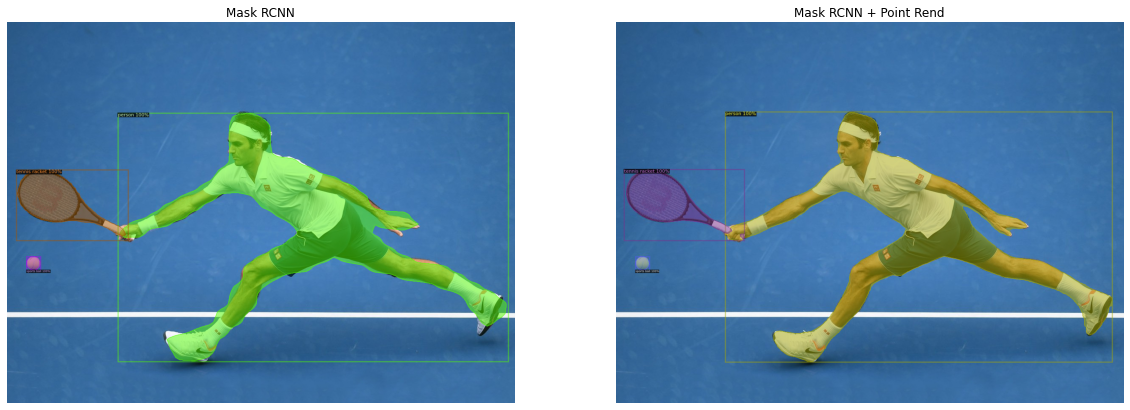

In [39]:
comparar(resultado_mask_rcnn, resultado_point_rend)

In [41]:
def realizar_deteccao_point_rend(img):
  saida = predictor(img)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  v = Visualizer(rgb, coco_metadata, scale = 1)

  # Visualizando a segmentação
  resultado_point_rend = v.draw_instance_predictions(saida['instances'].to('cpu')).get_image()

  mostrar_imagem(resultado_point_rend)

/content/detectron2_repo/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/content/detectron2_repo/projects/PointRend/point_rend/point_features.py:142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  point_coords[:, :, 1] = h_step / 2.0 + (point

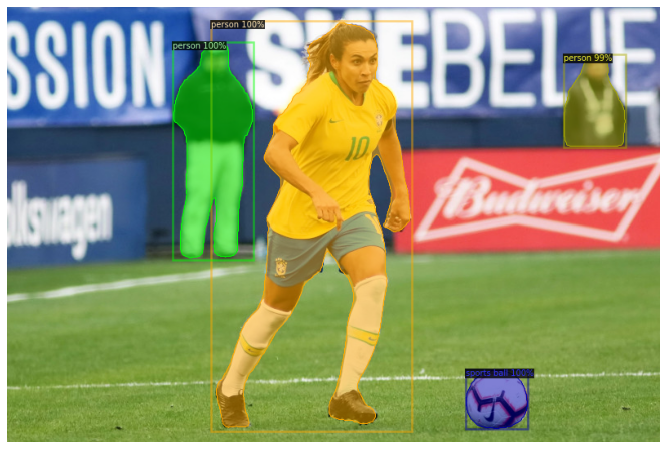

In [42]:
realizar_deteccao_point_rend(cv2.imread('/content/fotos/futebol01.jpg'))

/content/detectron2_repo/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/content/detectron2_repo/projects/PointRend/point_rend/point_features.py:142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  point_coords[:, :, 1] = h_step / 2.0 + (point

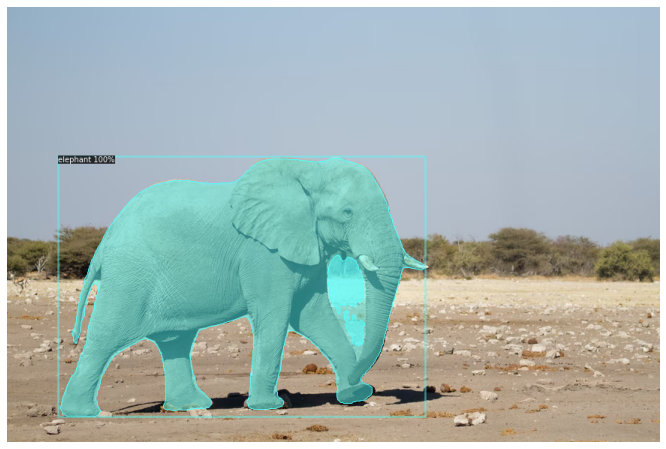

In [43]:
realizar_deteccao_point_rend(cv2.imread('/content/fotos/elefante.jpg'))

/content/detectron2_repo/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/content/detectron2_repo/projects/PointRend/point_rend/point_features.py:142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  point_coords[:, :, 1] = h_step / 2.0 + (point

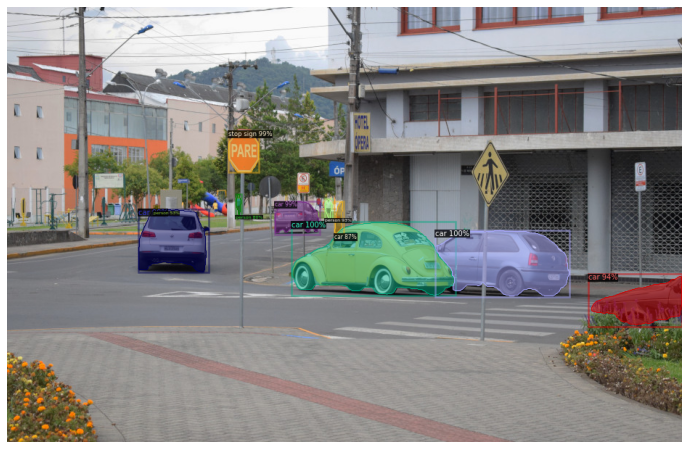

In [44]:
realizar_deteccao_point_rend(cv2.imread('/content/fotos/cena-urbana01.jpg'))